# P4 Backpropagation tests

Imports needed for the notebook

In [24]:
from Neuron.Neuron import Neuron
from Neuron.NeuronLayer import NeuronLayer
from Neuron.NeuronNetwerk import NeuronNetwerk

from Neuron.neuronTests import test_neuron_network_results
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets

import pandas
import random
import matplotlib.pyplot as plt
import numpy as np

## Test for the AND-gate

In [2]:
and_back_propagation = Neuron([-0.5, 0.5], 1.5, "And gate")

and_back_layer = NeuronLayer([and_back_propagation])

and_back_network = NeuronNetwerk([and_back_layer])
and_back_network.train([[1, 1], [1, 0], [0, 1], [0, 0]], [[1], [0], [0], [0]], 1, 1000)
# and_back_network.train([[0, 0]], [[0]], 1, 1)
and_back_results = pandas.DataFrame(
    [
        [0, 0, and_back_network.get_feed_forward_results([0, 0]), test_neuron_network_results(and_back_network, [0, 0], [0])],
        [1, 0, and_back_network.get_feed_forward_results([1, 0]), test_neuron_network_results(and_back_network, [1, 0], [0])],
        [0, 1, and_back_network.get_feed_forward_results([0, 1]), test_neuron_network_results(and_back_network, [0, 1], [0])],
        [1, 1, and_back_network.get_feed_forward_results([1, 1]), test_neuron_network_results(and_back_network, [1, 1], [1])],
    ],
    columns = ['X1', 'X2', 'Result', 'Test']
)
print(f"Het resultaat van de gate is: {(and_back_results['Test'] == True).all()}")
print(and_back_network)
and_back_results

Het resultaat van de gate is: True
Netwerk(layers=Layer(neurons=Neuron(weights=[5.492847449452622, 5.496464793827719], bias=-8.338072924924216)))


,X1,X2,Result,Test
0,0,0,[0.00023917570010658685],True
1,1,0,[0.05492864384843537],True
2,0,1,[0.0551167281835556],True
3,1,1,[0.9340873341532527],True


## Test for the XOR-gate

In [3]:
xor_back_propagations_1 = Neuron([0.2, -0.4], 0, "xor gate")
xor_back_propagations_2 = Neuron([0.7, 0.1], 0, "xor gate")
xor_back_propagations_3 = Neuron([0.6, 0.9], 0, "xor gate")
xor_back_layer_1 = NeuronLayer([xor_back_propagations_1, xor_back_propagations_2])
xor_back_layer_2 = NeuronLayer([xor_back_propagations_3])
xor_back_network = NeuronNetwerk([xor_back_layer_1, xor_back_layer_2])

xor_back_network.train([[1, 1], [1, 0], [0, 1], [0, 0]], [[0], [1], [1], [0]], 1, 1000)
# xor_back_network.train([[1, 1]],[[0]], 1, 1) 
xor_back_results = pandas.DataFrame(
    [
        [0, 0, xor_back_network.get_feed_forward_results([0, 0]), test_neuron_network_results(xor_back_network, [0, 0], [0])],
        [1, 0, xor_back_network.get_feed_forward_results([1, 0]), test_neuron_network_results(xor_back_network, [1, 0], [1])],
        [0, 1, xor_back_network.get_feed_forward_results([0, 1]), test_neuron_network_results(xor_back_network, [0, 1], [1])],
        [1, 1, xor_back_network.get_feed_forward_results([1, 1]), test_neuron_network_results(xor_back_network, [1, 1], [0])],
    ],
    columns = ['X1', 'X2', 'Result', 'Test']
)
print(xor_back_network)

print(f"Het resultaat van de gate is: {(xor_back_results['Test'] == True).all()}")
xor_back_results

Netwerk(layers=Layer(neurons=Neuron(weights=[5.672006879291299, -5.523077232563653], bias=-3.6203723909631207), Neuron(weights=[3.792559774722619, -3.4836079932519084], bias=1.486557708544871)),
	Layer(neurons=Neuron(weights=[5.901686655673089, -5.13162902714908], bias=2.153212254219473)))
Het resultaat van de gate is: True


,X1,X2,Result,Test
0,0,0,[0.13261183719358358],True
1,1,0,[0.9069681521385837],True
2,0,1,[0.8235442216115195],True
3,1,1,[0.11206413537601694],True


## Tests for the half adder
First we create the half adder.

In [4]:
top_neuron = Neuron([0, 0.1], 0)
mid_neuron = Neuron([0.2, 0.3], 0)
bottom_neuron = Neuron([0.4, 0.5], 0)

carry = Neuron([0.6, 0.7, 0.8], 0)
Sum = Neuron([0.9, 1, 1.1], 0)

haddr_layer_1 = NeuronLayer([top_neuron, mid_neuron, bottom_neuron])
haddr_layer_2 = NeuronLayer([Sum, carry])

haddr = NeuronNetwerk([haddr_layer_1, haddr_layer_2])

Now we can train the half adder and test it.

In [5]:
haddr.train([[1, 1], [1, 0], [0, 1], [0, 0]],
            [[1, 1], [1, 0], [0, 1], [0, 0]], 0.1, 1000)
        

haddr_results = pandas.DataFrame(
    [
        [1, 1, haddr.get_feed_forward_results([1, 1]), test_neuron_network_results(haddr, [1, 1], [1, 1])],
        [1, 0, haddr.get_feed_forward_results([1, 0]), test_neuron_network_results(haddr, [1, 0], [1, 0])],
        [0, 1, haddr.get_feed_forward_results([0, 1]), test_neuron_network_results(haddr, [0, 1], [0, 1])],
        [0, 0, haddr.get_feed_forward_results([0, 0]), test_neuron_network_results(haddr, [0, 0], [0, 0])],
    ],
    columns = ['X1', 'X2', 'Result', 'Test']
)

print(f"Het resultaat van de gate is: {(haddr_results['Test'] == True).all()}")
haddr_results

Het resultaat van de gate is: True


,X1,X2,Result,Test
0,1,1,"[0.8775157593360844, 0.8401924996385909]",True
1,1,0,"[0.7610245250801883, 0.2459852584406926]",True
2,0,1,"[0.27175649713332833, 0.761239981601955]",True
3,0,0,"[0.13752077172415222, 0.16465397351324024]",True


## Test voor de iris dataset

Eerst het inladen van de dataset

In [42]:
iris = load_iris()
iris_data = pandas.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = pandas.Series(iris.target)

Nu het opzetten van het netwerk met de benodigde neurons en layers.

In [43]:
input1 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
input2 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
input3 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
input4 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)

iris_input_layer = NeuronLayer([input1, input2, input3, input4])

hidden1 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
hidden2 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
hidden3 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)

iris_hidden_layer = NeuronLayer([hidden1, hidden2, hidden3])

output1 = Neuron([random.random() for _ in range(3)], random.random(), eta=0.1)
output2 = Neuron([random.random() for _ in range(3)], random.random(), eta=0.1)
output3 = Neuron([random.random() for _ in range(3)], random.random(), eta=0.1)

iris_output_layer = NeuronLayer([output1, output2, output3])

iris_network = NeuronNetwerk([iris_input_layer, iris_hidden_layer, iris_output_layer])

Vervolgens gaan we het netwerk trainen

In [44]:
iris_data = iris.data.tolist()
iris_target = iris.target.tolist()

possible_outputs = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

targets = [possible_outputs[target] for target in iris_target]

X_train, X_test, y_train, y_test = train_test_split(iris_data, targets, test_size=0.25, random_state=0)

iris_network.train(X_train, y_train)

En uiteindelijk het resultaat weergeven

In [45]:
iris_results = pandas.DataFrame(
    [[in_p[0], in_p[1], in_p[2], in_p[3], iris_network.get_feed_forward_results(in_p), test_neuron_network_results(iris_network, in_p, out_p)] for in_p, out_p in zip(X_test, y_test)],
    columns = ['X1', 'X2', 'X3', 'X4', 'Result', 'Test']
)

results = iris_results.Test.value_counts()

accuracy = results[1] / sum(results) * 100

print(f"De accuracy van het netwerk is {accuracy.round(2)}% op de testset")

iris_results

De accuracy van het netwerk is 97.37% op de testset


,X1,X2,X3,X4,Result,Test
0,5.8,2.8,5.1,2.4,"[0.001270313205449365, 0.15312194421133082, 0....",True
1,6.0,2.2,4.0,1.0,"[0.0065140175794755175, 0.9912945577676067, 0....",True
2,5.5,4.2,1.4,0.2,"[0.9289695345678476, 0.07587908426777687, 0.00...",True
3,7.3,2.9,6.3,1.8,"[0.0012776656568487398, 0.15609177050725292, 0...",True
4,5.0,3.4,1.5,0.2,"[0.9289486636345172, 0.07590047631022691, 0.00...",True
5,6.3,3.3,6.0,2.5,"[0.0012668589447479015, 0.15173598617987738, 0...",True
6,5.0,3.5,1.3,0.3,"[0.9289546534363977, 0.07589438098955512, 0.00...",True
7,6.7,3.1,4.7,1.5,"[0.005937222437246532, 0.9875846013179281, 0.0...",True
8,6.8,2.8,4.8,1.4,"[0.004751292730067183, 0.9704822126542709, 0.0...",True
9,6.1,2.8,4.0,1.3,"[0.006709120865494158, 0.9913320188591, 0.0094...",True


## Test voor de digits dataset.

Eerst laden we de dataset in. we checken ook meteen met 1 voorbeeld ui de data of het gelukt is.

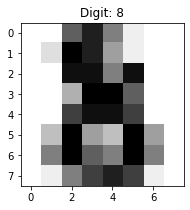

In [46]:
digits = datasets.load_digits()

plt.figure(1, figsize=(3, 3))
# Set title to the first character of the target name
plt.title(f"Digit: {digits.target[-1]}")
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()


Vervolgens zetten we het netwerk op met de benogide neurons en layers.

In [47]:
digit_inputs = [Neuron([random.random() for _ in range(64)], random.random(), eta=0.5) for _ in range(10)]

digit_input_layer = NeuronLayer(digit_inputs)

digit_hidden = [Neuron([random.random() for _ in range(10)], random.random(), eta=0.5) for _ in range(16)]

digit_hidden_layer = NeuronLayer(digit_hidden)

digit_output = [Neuron([random.random() for _ in range(16)], random.random(), eta=0.5) for _ in range(10)]

digit_output_layer = NeuronLayer(digit_output)

digit_network = NeuronNetwerk([digit_input_layer, digit_hidden_layer, digit_output_layer])

Hier trainen we het netwerk

In [48]:
digit_data = digits.data.tolist()
digit_target = digits.target.tolist()

possible_outputs = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
]

targets = [possible_outputs[target] for target in digit_target]

X_train, X_test, y_train, y_test = train_test_split(digit_data, targets, test_size=0.1, random_state=0)

# normalize the data
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

# digit_network.train(X_train, y_train, max_epochs=100)
digit_network.train(X_train, y_train, max_epochs=100)

In [58]:
digit_network.feed_forward(X_train[2])
digit_network.get_feed_forward_results(X_train[2])
y_train[2]


[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

En hier geven we de resultaten weer van ons netwerk.

In [49]:

digit_results = pandas.DataFrame(
    [[in_p[i] for i in range(64)] + [digit_network.get_feed_forward_results(in_p), test_neuron_network_results(digit_network, in_p, out_p)] for in_p, out_p in zip(X_test, y_test)],
    columns = [f"X{i}" for i in range(64)] + ['Result', 'Test']
)

digit_results

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,Result,Test
0,0.0,0.000000,0.043137,0.062745,0.058824,0.011765,0.000000,0.000000,0.0,0.019608,...,0.0,0.000000,0.050980,0.050980,0.031373,0.050980,0.062745,0.031373,"[0.07248248005265373, 0.09529505865658099, 0.0...",False
1,0.0,0.003922,0.058824,0.054902,0.007843,0.000000,0.000000,0.000000,0.0,0.023529,...,0.0,0.003922,0.058824,0.062745,0.047059,0.003922,0.000000,0.000000,"[0.07267866047786035, 0.09553403684708844, 0.0...",False
2,0.0,0.007843,0.050980,0.062745,0.039216,0.000000,0.000000,0.000000,0.0,0.047059,...,0.0,0.003922,0.050980,0.062745,0.062745,0.062745,0.062745,0.011765,"[0.07245394003310145, 0.09532075027135714, 0.0...",False
3,0.0,0.000000,0.035294,0.027451,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.027451,0.054902,0.062745,0.047059,0.003922,0.000000,"[0.0732582998274538, 0.09598865112209463, 0.09...",False
4,0.0,0.000000,0.011765,0.050980,0.023529,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.011765,0.050980,0.058824,0.031373,0.000000,0.000000,"[0.07310737069262573, 0.09583722837322632, 0.0...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.000000,0.007843,0.058824,0.050980,0.011765,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.011765,0.047059,0.054902,0.039216,0.000000,0.000000,"[0.07200456668324595, 0.09475888712277666, 0.0...",False
176,0.0,0.007843,0.043137,0.054902,0.039216,0.003922,0.000000,0.000000,0.0,0.023529,...,0.0,0.003922,0.047059,0.062745,0.062745,0.039216,0.000000,0.000000,"[0.07299347221749711, 0.09572142156793073, 0.0...",False
177,0.0,0.000000,0.011765,0.047059,0.058824,0.043137,0.007843,0.000000,0.0,0.000000,...,0.0,0.000000,0.007843,0.050980,0.062745,0.047059,0.000000,0.000000,"[0.07238423995436624, 0.09512683732077934, 0.0...",False
178,0.0,0.000000,0.007843,0.058824,0.058824,0.011765,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.003922,0.047059,0.062745,0.062745,0.039216,0.000000,"[0.07245555937913614, 0.0951869947035542, 0.09...",False


Nu laten we het percentage van de accuray zien.


In [50]:

results = digit_results.Test.value_counts()

accuracy = results[1] / sum(results) * 100

print(f"De accuracy van het netwerk is {accuracy.round(2)}% op de testset")

KeyError: 1